# Word Embedding

Word embedding is a method to <b>represent words in a numerical way</b> that allows words with similar meaning to have a similar representation. More specifically, methods to map vocabularies to vectors. Each word is mapped to one vector and the vector values are learned in a way that resembles a neural network. <br>

The distributed representation is learned based on the usage of words. This allows words that are used in similar ways to result in having similar representations, naturally capturing their meaning. This can be contrasted with the crisp but fragile representation in a bag of words model where, unless explicitly managed, different words have different representations, regardless of how they are used.

Embedding, as stated above, is used to create feature vectors from words. The idea is to encode their meaning and allow us to calculate a similarity score for any pair of words for example.

<b>What can we do with an embedded corpus?</b>

<li>determine similarity scores between documents for a search engine, using cosine similarity for example
<li>identify topics of the documents
<li>build a recommender system to suggest other movies based on the synopsis
<li>machine translation to identify that “Au revoir” and “Goodbye” actually mean the same thing

<b>Word Embedding Algorithms</b><br>

Word embedding methods learn a real-valued vector representation for a predefined fixed sized vocabulary from a corpus of text.

The learning process is either joint with the neural network model on some task, such as document classification, or is an unsupervised process, using document statistics.

There are 3 techniques that can be used to learn a word embedding from text data.

<b>1. Embedding Layer</b><br>
An embedding layer is a word embedding that is learned jointly with a neural network model on a specific natural language processing task, such as language modeling or document classification.

It requires that document text be cleaned and prepared such that each word is one-hot encoded. The size of the vector space is specified as part of the model, such as 50, 100, or 300 dimensions. The vectors are initialized with small random numbers. The embedding layer is used on the front end of a neural network and is fit in a supervised way using the Backpropagation algorithm.

<b>2. Word2Vec model</b><br>
Word2Vec is a statistical method for efficiently learning a standalone word embedding from a text corpus. Additionally, the work involved analysis of the learned vectors and the exploration of vector math on the representations of words. For example, that subtracting the “man-ness” from “King” and adding “women-ness” results in the word “Queen“, capturing the analogy “king is to queen as man is to woman“.<br>

Two different learning models were introduced that can be used as part of the word2vec approach to learn the word embedding; they are:<br>

<li>Continuous Bag-of-Words, or CBOW model.</li>
<li>Continuous Skip-Gram Model.</li>

In short, CBOW attempts to guess the output (target word) from its neighbouring words (context words) whereas continuous Skip-Gram guesses the context words from a target word. <br>

The difference between Skip-gram and CBOW: <br>
<b>Skip-gram:</b> Works well with small amount of the training data, represents well even rare words or phrases<br>
<b>CBOW:</b> Several times faster to train than the skip-gram, slightly better accuracy for the frequent words<br>

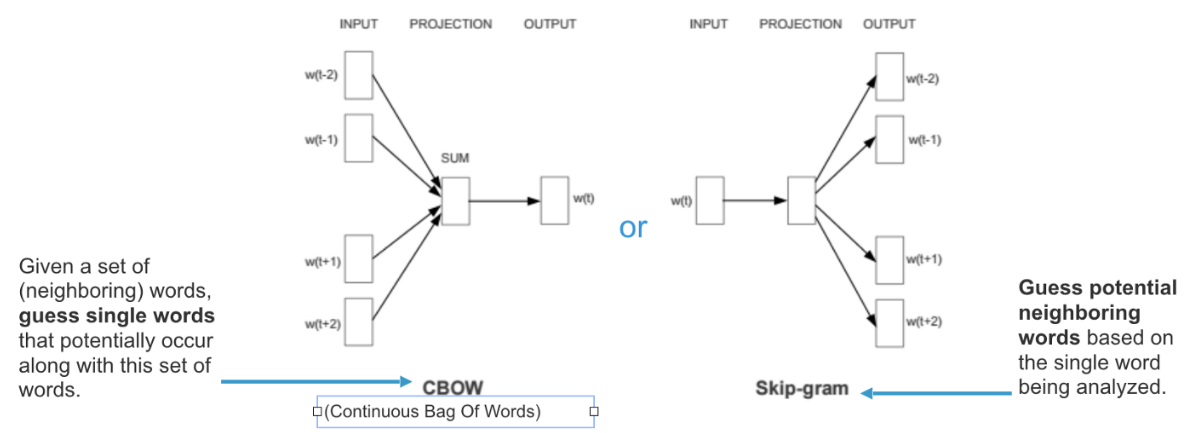

<b>3. GloVe</b><br>
The Global Vectors for Word Representation, or GloVe, algorithm is an extension to the word2vec method for efficiently learning word vectors.<br>

Classical vector space model representations of words were developed using `matrix factorization techniques` such as Latent Semantic Analysis (LSA) that do a good job of using global text statistics but are not as good as the learned methods like word2vec at capturing meaning and demonstrating it on tasks like calculating analogies (e.g. the King and Queen example above).

<b>GloVe is an approach to marry both the global statistics of matrix factorization techniques like LSA with the local context-based learning in word2vec.</b>

Rather than using a window to define local context, GloVe constructs an explicit word-context or word co-occurrence matrix using statistics across the whole text corpus. The result is a learning model that may result in generally better word embeddings.

### Skip-gram

First of all, we need to define the list of vocabulary. The task we’ll teach our model to do is to learn the probability that two words are “nearby” within a text. For each “target” word among our vocabulary, we do that by :

<li>defining a window size, i.e. the context of the word
<li>picking randomly a word within the window size around the target word
<li>counting the number of times they appear together
<li>applying softmax activation to create probabilities

    
The output probabilities are a measure of how likely it is that these 2 words appear together. All we need to do once the model has been trained is to drop the output layer. Indeed, we are only interested in the vector representation of the words.

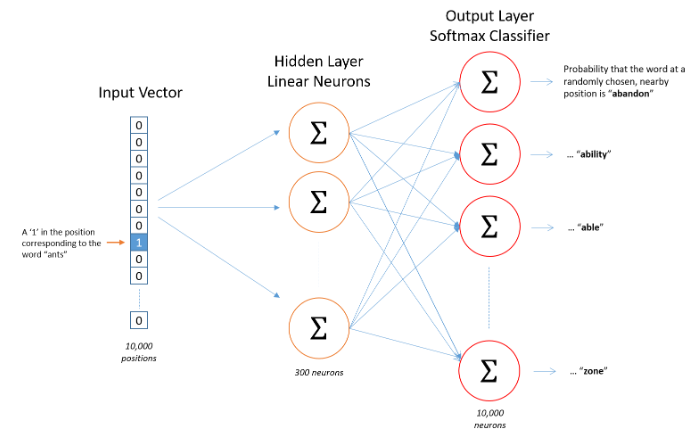

<b>Context Word Selection Options</b><br>
If your goal is to build language model then it is good to take last few words, say 4.<br>
If your goal is to learn word embeddings then there are multiple combinations to use:
<li>4 words on left & right, 
<li>last 1 word, 
<li>nearby 1 word (skip gram)
<br>
<br>
In this notebook, we will uaw the option of selecting 2 words on the left and 2 words on the right

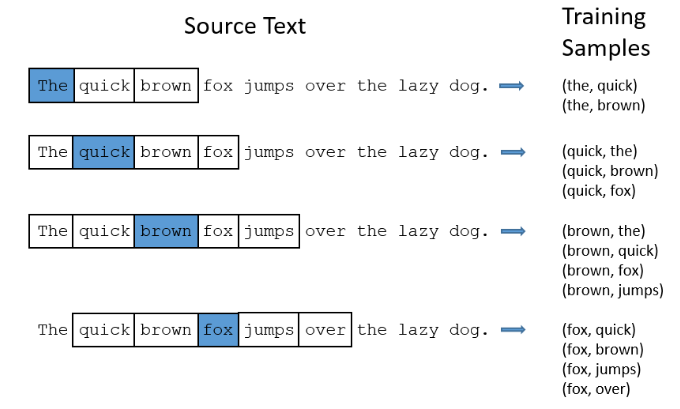

Given the sentence `"natural language processing and machine learning is fun and exciting"`, in reference to the figure below, notice that each of the word in the corpus will be a target word as the window (of size 2) slides.

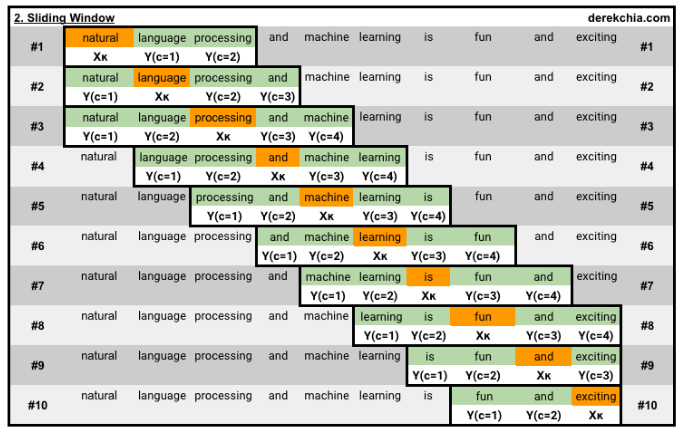

### Data Preparation

Generate training data by converting each token into `one-hot encoded representation` for the word2vec model to train on. <br>

Below figure shows `10 windows` where each window consists of both the target word and its context words, highlighted in orange and green respectively.

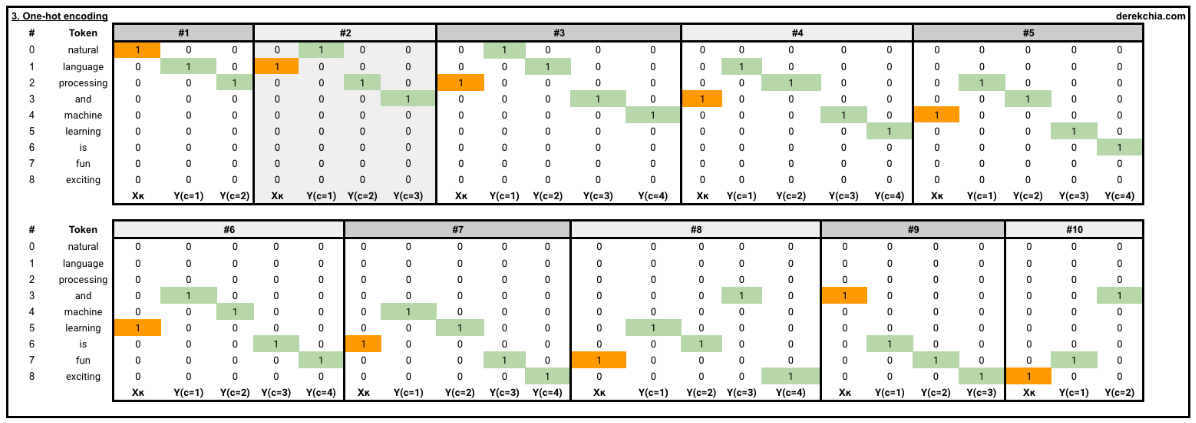

For Example, in window # 1 - Target word is `natural` and Context words are `(language, processing)` and their corresponding one-hot vectors are <br>
`Target` - [list([1, 0, 0, 0, 0, 0, 0, 0, 0])<br>
`Context` - [list([[0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0]])]

In [8]:
import re
import numpy as np

def tokenize(text):
    # Simple tokenizer for this usecase alone
    # obtains tokens with a least 1 alphabet
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

def mapping(tokens):
    word_to_id = dict()
    id_to_word = dict()

    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token

    return word_to_id, id_to_word

def generate_training_data(tokens, word_to_id, window_size):
    N = len(tokens)
    X, Y = [], []

    for i in range(N):
        nbr_inds = list(range(max(0, i - window_size), i)) + \
                   list(range(i + 1, min(N, i + window_size + 1)))
        for j in nbr_inds:
            X.append(word_to_id[tokens[i]])
            Y.append(word_to_id[tokens[j]])
            
    X = np.array(X)
    X = np.expand_dims(X, axis=0)
    Y = np.array(Y)
    Y = np.expand_dims(Y, axis=0)

    return X, Y

In [10]:
doc = "After the deduction of the costs of investing, " \
      "beating the stock market is a loser's game."
tokens = tokenize(doc)
word_to_id, id_to_word = mapping(tokens)
X, Y = generate_training_data(tokens, word_to_id, 2)
vocab_size = len(id_to_word)
m = Y.shape[1]

# turn Y into one hot encoding
Y_one_hot = np.zeros((vocab_size, m))
Y_one_hot[Y.flatten(), np.arange(m)] = 1 #find values of np.arange(m) in Y.flatten() and replace with 1 and replace remaining with 0s

In [11]:
print(word_to_id)

{'costs': 0, 'a': 1, 'after': 2, 'deduction': 3, 'the': 4, 'is': 5, "loser's": 6, 'game': 7, 'beating': 8, 'market': 9, 'investing': 10, 'stock': 11, 'of': 12}


In [27]:
print(vocab_size)

13


In [25]:
print(len(X.flatten()), len(Y.flatten()))

58 58


In [12]:
X

array([[ 2,  2,  4,  4,  4,  3,  3,  3,  3, 12, 12, 12, 12,  4,  4,  4,
         4,  0,  0,  0,  0, 12, 12, 12, 12, 10, 10, 10, 10,  8,  8,  8,
         8,  4,  4,  4,  4, 11, 11, 11, 11,  9,  9,  9,  9,  5,  5,  5,
         5,  1,  1,  1,  1,  6,  6,  6,  7,  7]])

In [13]:
Y

array([[ 4,  3,  2,  3, 12,  2,  4, 12,  4,  4,  3,  4,  0,  3, 12,  0,
        12, 12,  4, 12, 10,  4,  0, 10,  8,  0, 12,  8,  4, 12, 10,  4,
        11, 10,  8, 11,  9,  8,  4,  9,  5,  4, 11,  5,  1, 11,  9,  1,
         6,  9,  5,  6,  7,  5,  1,  7,  1,  6]])

In [36]:
Y_one_hot.shape

(13, 58)

In [37]:
Y_one_hot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [23]:
# doc: doc = "After the deduction of the costs of investing, beating the stock market is a loser's game."
#Input data
# X: after        | Y: the, Y: deduction
# X: the          | Y: after, Y: deduction, Y: of
# X: deduction    | Y: after, Y: the, Y: of, Y: the
# X: of           | Y: the, Y: deduction, Y: the, Y: costs
#.......

### Initialization

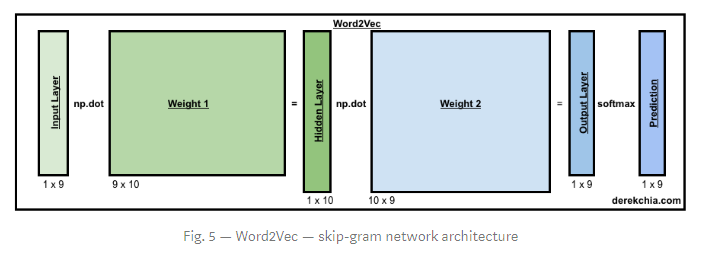

There are two weights in the model needed to be initialized and trained, `weights of the embedding matrix and of the dense layer`. <br>

The shape of the word embedding will be `(vocab_size, emb_size)`.<br>
The shape of the dense layer will be `(emb_size, vocab_size)`.<br>

The input of dense layer will be `(emb_size, # of training instances)` and we’d like the output to be `(vocab_size, # of training instances)` i.e., for each word, we would like to know what the probability that the word appears with the given input word.

In [14]:
def initialize_wrd_emb(vocab_size, emb_size):
    """
    vocab_size: int. vocabulary size of your corpus or training data
    emb_size: int. word embedding size. How many dimensions to represent each vocabulary
    """
    WRD_EMB = np.random.randn(vocab_size, emb_size) * 0.01
    
    assert(WRD_EMB.shape == (vocab_size, emb_size))
    return WRD_EMB

def initialize_dense(input_size, output_size):
    """
    input_size: int. size of the input to the dense layer
    output_szie: int. size of the output out of the dense layer
    """
    W = np.random.randn(output_size, input_size) * 0.01
    
    assert(W.shape == (output_size, input_size))
    return W

def initialize_parameters(vocab_size, emb_size):
    WRD_EMB = initialize_wrd_emb(vocab_size, emb_size)
    W = initialize_dense(emb_size, vocab_size)
    
    parameters = {}
    parameters['WRD_EMB'] = WRD_EMB
    parameters['W'] = W
    
    return parameters

### Forward Propagation

There are 3 steps in the forward propagation: <br>
<li>obtaining input word’s vector representation from word embedding, 
<li>passing the vector to the dense layer,
<li>applying softmax function to the output of the dense layer.

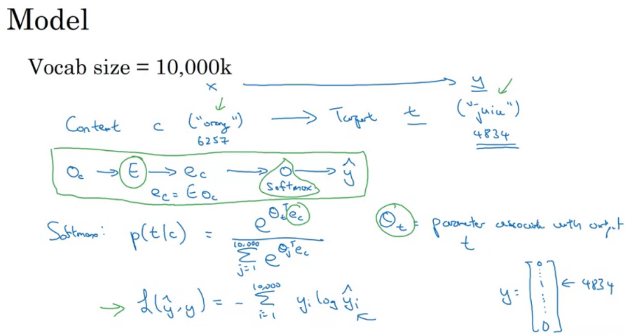

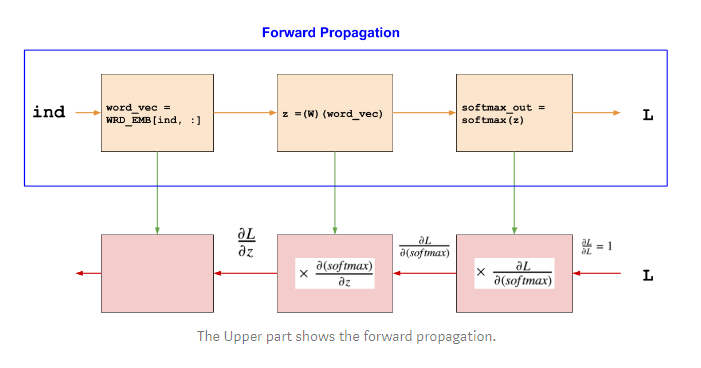

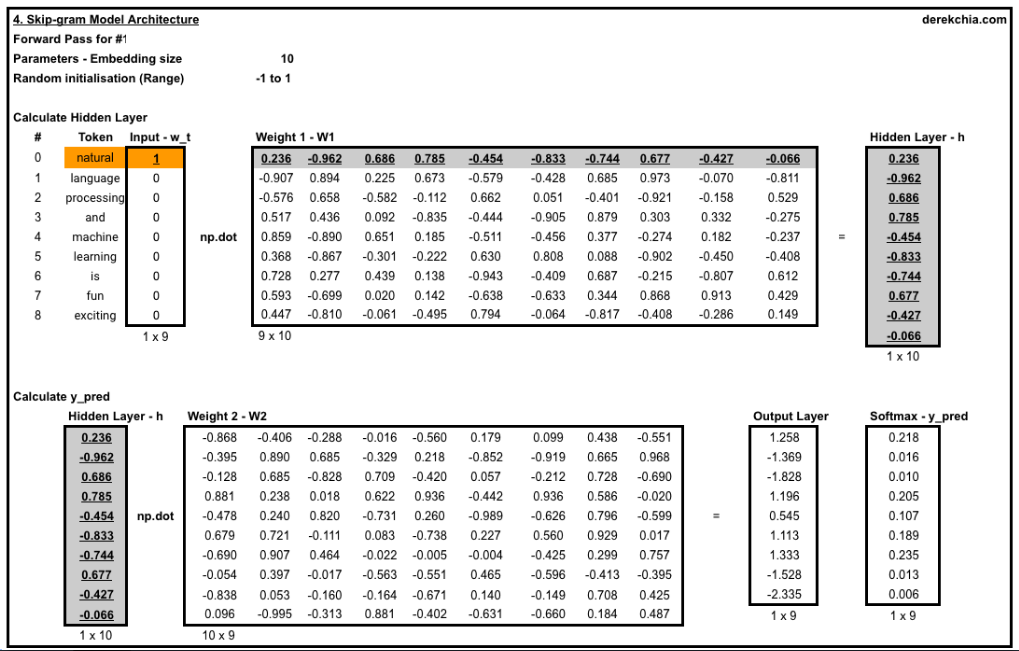

In [15]:
def ind_to_word_vecs(inds, parameters):
    """
    inds: numpy array. shape: (1, m)
    parameters: dict. weights to be trained
    """
    m = inds.shape[1]
    WRD_EMB = parameters['WRD_EMB']
    word_vec = WRD_EMB[inds.flatten(), :].T
    
    assert(word_vec.shape == (WRD_EMB.shape[1], m))
    
    return word_vec

def linear_dense(word_vec, parameters):
    """
    word_vec: numpy array. shape: (emb_size, m)
    parameters: dict. weights to be trained
    """
    m = word_vec.shape[1]
    W = parameters['W']
    Z = np.dot(W, word_vec)
    
    assert(Z.shape == (W.shape[0], m))
    
    return W, Z

def softmax(Z):
    """
    Z: output out of the dense layer. shape: (vocab_size, m)
    """
    softmax_out = np.divide(np.exp(Z), np.sum(np.exp(Z), axis=0, keepdims=True) + 0.001)
    
    assert(softmax_out.shape == Z.shape)

    return softmax_out

def forward_propagation(inds, parameters):
    word_vec = ind_to_word_vecs(inds, parameters)
    W, Z = linear_dense(word_vec, parameters)
    softmax_out = softmax(Z)
    
    caches = {}
    caches['inds'] = inds
    caches['word_vec'] = word_vec
    caches['W'] = W
    caches['Z'] = Z
    
    return softmax_out, caches

### Cost Function
Here, we use cross entropy to calculate cost

In [16]:
def cross_entropy(softmax_out, Y):
    """
    softmax_out: output out of softmax. shape: (vocab_size, m)
    """
    m = softmax_out.shape[1]
    cost = -(1 / m) * np.sum(np.sum(Y * np.log(softmax_out + 0.001), axis=0, keepdims=True), axis=1)
    return cost

### Backward Propagation

It is the weights in the dense layer and the word embedding layer that we would like to train. Therefore we need to calculate gradients for those weights

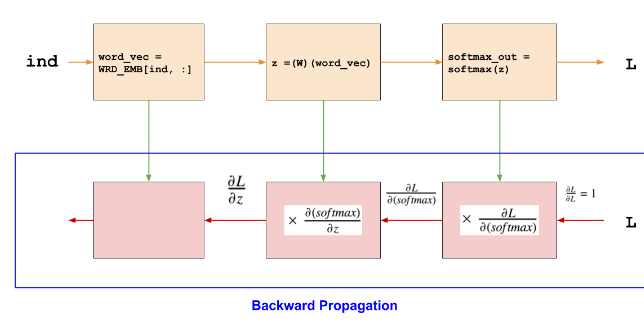

In [17]:
def softmax_backward(Y, softmax_out):
    """
    Y: labels of training data. shape: (vocab_size, m)
    softmax_out: output out of softmax. shape: (vocab_size, m)
    """
    dL_dZ = softmax_out - Y
    
    assert(dL_dZ.shape == softmax_out.shape)
    return dL_dZ

def dense_backward(dL_dZ, caches):
    """
    dL_dZ: shape: (vocab_size, m)
    caches: dict. results from each steps of forward propagation
    """
    W = caches['W']
    word_vec = caches['word_vec']
    m = word_vec.shape[1]
    
    dL_dW = (1 / m) * np.dot(dL_dZ, word_vec.T)
    dL_dword_vec = np.dot(W.T, dL_dZ)

    assert(W.shape == dL_dW.shape)
    assert(word_vec.shape == dL_dword_vec.shape)
    
    return dL_dW, dL_dword_vec

def backward_propagation(Y, softmax_out, caches):
    dL_dZ = softmax_backward(Y, softmax_out)
    dL_dW, dL_dword_vec = dense_backward(dL_dZ, caches)
    
    gradients = dict()
    gradients['dL_dZ'] = dL_dZ
    gradients['dL_dW'] = dL_dW
    gradients['dL_dword_vec'] = dL_dword_vec
    
    return gradients

def update_parameters(parameters, caches, gradients, learning_rate):
    vocab_size, emb_size = parameters['WRD_EMB'].shape
    inds = caches['inds']
    dL_dword_vec = gradients['dL_dword_vec']
    m = inds.shape[-1]
    
    parameters['WRD_EMB'][inds.flatten(), :] -= dL_dword_vec.T * learning_rate

    parameters['W'] -= learning_rate * gradients['dL_dW']
    

In [31]:
from datetime import datetime

import matplotlib.pyplot as plt


def skipgram_model_training(X, Y, vocab_size, emb_size, learning_rate, epochs, batch_size=256, parameters=None, print_cost=False, plot_cost=True):
    costs = []
    m = X.shape[1]
    
    if parameters is None:
        parameters = initialize_parameters(vocab_size, emb_size)
    
    begin_time = datetime.now()
    for epoch in range(epochs):
        epoch_cost = 0
        batch_inds = list(range(0, m, batch_size)) #always gives [0] when m=58 and batch_size>m
        np.random.shuffle(batch_inds)
        for i in batch_inds:
            X_batch = X[:, i:i+batch_size] #gives full batch of X
            Y_batch = Y[:, i:i+batch_size] ##gives full batch of Y
            
            softmax_out, caches = forward_propagation(X_batch, parameters)
            gradients = backward_propagation(Y_batch, softmax_out, caches)
            update_parameters(parameters, caches, gradients, learning_rate)
            cost = cross_entropy(softmax_out, Y_batch)
            epoch_cost += np.squeeze(cost)
            
        costs.append(epoch_cost)
        if print_cost and epoch % (epochs // 500) == 0:
            print("Cost after epoch {}: {}".format(epoch, epoch_cost))
        if epoch % (epochs // 100) == 0:
            learning_rate *= 0.98
    end_time = datetime.now()
    print('training time: {}'.format(end_time - begin_time))
            
    if plot_cost:
        plt.plot(np.arange(epochs), costs)
        plt.xlabel('# of epochs')
        plt.ylabel('cost')
    return parameters

m:  58
batch_inds:  [0]
Cost after epoch 0: 2.552136886525233
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 10: 2.551733665323597
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 20: 2.5513061021963392
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 30: 2.550826358736026
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 40: 2.5502657629027072
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0

batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 510: 2.02208845875973
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 520: 2.0138757770181033
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 530: 2.0054858922224437
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 540: 1.9969438811680291
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 550: 1.9882861617450986
batch_inds:  [0]
batch_inds:  [0

batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 950: 1.8480857439613094
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 960: 1.8487137176220199
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 970: 1.8494249047301632
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 980: 1.8502186357804882
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 990

batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 1410: 1.9104852167782032
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 1420: 1.9113243016478216
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 1430: 1.9121105541305383
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 1440: 1.9128436129198745
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 1450: 1.9135233158902933
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_in

batch_inds:  [0]
Cost after epoch 1870: 1.9116493247339332
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 1880: 1.911354984533631
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 1890: 1.9110617570796935
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 1900: 1.9107699904039663
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 1910: 1.9104853444250147
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_ind

batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 2310: 1.9003936896625027
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 2320: 1.9001412937260818
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 2330: 1.899888552252021
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 2340: 1.8996357125964805
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 2350: 1.8993830354105012
batch_inds:  [0]
batch_inds:  [0]
batch_ind

batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 2760: 1.8925712579511687
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 2770: 1.8925179338143379
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 2780: 1.8924695468162749
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 2790: 1.892426061997685
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 2800: 1.892387440363278
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds

batch_inds:  [0]
Cost after epoch 3200: 1.8936820358584823
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 3210: 1.8937554540537795
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 3220: 1.893829887746395
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 3230: 1.8939054328845968
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 3240: 1.89398204331544
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:

batch_inds:  [0]
Cost after epoch 3640: 1.8971764575215069
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 3650: 1.8972511413777269
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 3660: 1.897324168087902
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 3670: 1.89739668549553
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 3680: 1.8974688120771925
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:

batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 4060: 1.8995425290912333
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 4070: 1.8995761395953792
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 4080: 1.8996087151520364
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 4090: 1.8996402398668437
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 4100: 1.8996706983213265
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_in

batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 4490: 1.8999613456899904
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 4500: 1.8999476510856461
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 4510: 1.8999332455977596
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 4520: 1.8999179080568789
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 4530: 1.899901608154283
batch_inds:  [0]
batch_ind

batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 4940: 1.898613766876007
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 4950: 1.8985707321097947
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 4960: 1.8985279507350654
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 4970: 1.8984847361176875
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
batch_inds:  [0]
Cost after epoch 4980: 1.898441005740373
batch_inds:  [0]
batch_inds:  [0]
batch_inds

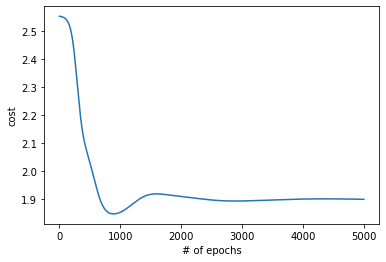

In [32]:
paras = skipgram_model_training(X, Y_one_hot, vocab_size, 50, 0.05, 5000, batch_size=128, parameters=None, print_cost=True)

### Evaluation

In [20]:
X_test = np.arange(vocab_size)
X_test = np.expand_dims(X_test, axis=0)
softmax_test, _ = forward_propagation(X_test, paras)
top_sorted_inds = np.argsort(softmax_test, axis=0)[-4:,:]

In [21]:
for input_ind in range(vocab_size):
    input_word = id_to_word[input_ind]
    output_words = [id_to_word[output_ind] for output_ind in top_sorted_inds[::-1, input_ind]]
    print("{}'s neighbor words: {}".format(input_word, output_words))

costs's neighbor words: ['investing', 'of', 'the', "loser's"]
a's neighbor words: ['game', 'is', 'market', "loser's"]
after's neighbor words: ['deduction', 'the', 'after', 'costs']
deduction's neighbor words: ['the', 'costs', 'beating', 'after']
the's neighbor words: ['market', 'deduction', 'stock', 'is']
is's neighbor words: ['a', "loser's", 'stock', 'market']
loser's's neighbor words: ['game', 'is', 'market', "loser's"]
game's neighbor words: ['a', "loser's", 'stock', 'market']
beating's neighbor words: ['stock', 'the', 'investing', 'of']
market's neighbor words: ['a', 'stock', 'is', 'market']
investing's neighbor words: ['the', 'costs', 'beating', 'after']
stock's neighbor words: ['is', 'beating', 'market', 'the']
of's neighbor words: ['costs', 'beating', 'the', 'deduction']


### Limitations

The Skip-Gram model must compute a huge number of weights. For a vocabulary size of 10’000 words and 500 features, we would have 5 million weights in the hidden layer and the output layer. We also need a huge number of training data (typically counting in billions at that point). Since companies like Google train those models on the entire Web (or close), the number of weights to compute is just enormous.<br>
<br>
The training becomes pretty much impossible, which is the reason why the authors of Word2Vec have developed a second version called Continuous Bag-Of-Words that contains several tweaks to make the training faster.

### Performance improvements of Skip-Gram

<b>Subsampling frequent words</b><br>
<br>
When we create training samples :

<li>words such as “the”, “my”, “a”… don’t bring much information
<li>we’ll end up with too many samples containing these stop words
<br>
The authors propose a sampling rate which states whether we should keep a word or not. P(wi) describes the probability of keeping a word:
    
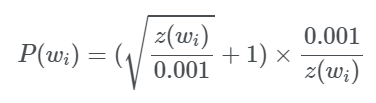
    
Where `z(wi)` is the fraction of the total words in the corpus that the word wi represents. For example, if the word “peanut” occurs 1,000 times in a 1 billion word corpus, then `z(‘peanut’) = 1E-6`.<br>
<br>
There is also a parameter in the code named `sample` which controls how much subsampling occurs, and the default value is 0.001. Smaller values of ‘sample’ mean words are less likely to be kept.

<b>Negative Samplilng</b><br>
<br>
By training our neural network, we adjust the neuron weights for each input data. However, we have to modify all weights at each step, i.e. billions of weight for each training sample.

In negative sampling, we only modify a small percentage of the weights at each step. Indeed, we will modify the weights of “negative samples”, i.e a list of 5 to 20 words that we will take as inputs along with the target word.

We want the neuron to output 0 for all the negative samples that we added to our target word. By doing this, instead of selecting the whole vocabulary size, we select typically 10+1=11 words out of a vocabulary size of 10,000 for example. This is a drastic drop in the overall amount of computations required.

`The paper says that selecting 5-20 words works well for smaller datasets, and you can get away with only 2-5 words for large datasets.`

Recall that the output layer of our model has a weight matrix that’s 300 x 10,000. So we will just be updating the weights for our positive word (“quick”), plus the weights for 5 other words that we want to output 0. That’s a total of 6 output neurons, and 1,800 weight values total. That’s only 0.06% of the 3M weights in the output layer!

In the hidden layer, only the weights for the input word are updated (this is true whether you’re using Negative Sampling or not).

<b>Selecting negative samples</b><br>

The “negative samples” (that is, the 5 output words that we’ll train to output 0) are selected using a “unigram distribution”, where more frequent words are more likely to be selected as negative samples.

For instance, suppose you had your entire training corpus as a list of words, and you chose your 5 negative samples by picking randomly from the list. In this case, the probability for picking the word “couch” would be equal to the number of times “couch” appears in the corpus, divided the total number of word occus in the corpus. This is expressed by the following equation:

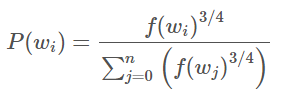

The authors state in their paper that they tried a number of variations on this equation, and the one which performed best was to raise the word counts to the 3/4 power:

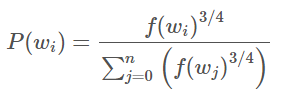

Where f(wi) is the number of times a given word appears in the corpus, and the denominator is the total number of words in the corpus.

<b>References:</b> <br>
https://towardsdatascience.com/an-implementation-guide-to-word2vec-using-numpy-and-google-sheets-13445eebd281 <br>
https://towardsdatascience.com/word2vec-from-scratch-with-numpy-8786ddd49e72 <br>
https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-skip-gram.html